In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
from ctr_function import dist_explore

from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
ctr = pd.read_csv("data/ctr_ad_user.csv")

In [3]:
ctr.drop(['Unnamed: 0', 'nonclk', 'time_stamp'], axis = 1, inplace= True)

In [4]:
ctr['time'] = pd.to_datetime(ctr['time'])

In [5]:
ctr['hour'] = ctr['time'].dt.hour 

In [6]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26557961 entries, 0 to 26557960
Data columns (total 19 columns):
user                     int64
adgroup_id               int64
pid                      object
clk                      int64
time                     datetime64[ns]
cate_id                  int64
campaign_id              int64
customer                 int64
brand                    float64
price                    float64
cms_segid                float64
cms_group_id             float64
final_gender_code        float64
age_level                float64
pvalue_level             float64
shopping_level           float64
occupation               float64
new_user_class_level     float64
hour                     int64
dtypes: datetime64[ns](1), float64(10), int64(7), object(1)
memory usage: 3.8+ GB


In [7]:
ctr.head()

,user,adgroup_id,pid,clk,time,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
0,581738,1,430548_1007,0,2017-05-07 06:14:04,9025,108570,1337,20169.0,17.0,0.0,8.0,1.0,2.0,NaN,3.0,0.0,NaN,6
1,449818,3,430548_1007,0,2017-05-13 01:26:18,5998,224368,30507,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,914836,4,430548_1007,0,2017-05-13 04:47:59,7958,385883,39662,216840.0,85.0,0.0,5.0,2.0,5.0,NaN,3.0,0.0,2.0,4
3,914836,5,430548_1007,0,2017-05-13 04:50:29,7958,385883,39662,216840.0,60.0,0.0,5.0,2.0,5.0,NaN,3.0,0.0,2.0,4
4,399907,8,430548_1007,0,2017-05-09 04:09:18,1626,388290,42349,241359.0,63.0,0.0,5.0,2.0,5.0,NaN,3.0,0.0,2.0,4


In [8]:
ctr.columns

Index(['user', 'adgroup_id', 'pid', 'clk', 'time', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level ', 'hour'],
      dtype='object')

In [9]:
ctr.nunique()

user                     1141729
adgroup_id                846811
pid                            2
clk                            2
time                      662061
cate_id                     6769
campaign_id               423436
customer                  255875
brand                      99814
price                      14861
cms_segid                     97
cms_group_id                  13
final_gender_code              2
age_level                      7
pvalue_level                   3
shopping_level                 3
occupation                     2
new_user_class_level           4
hour                          24
dtype: int64

In [10]:
print('page views per user is %.2f'%(len(ctr)/ctr.user.nunique()))
print('views per ad is %.2f'%(len(ctr)/ctr.adgroup_id.nunique()))

page views per user is 23.26
views per ad is 31.36


In [11]:
ctr['pid'] = ctr.pid.apply(lambda x: 1 if x=='430548_1007' else 0)


In [12]:
ctr['price'] = ctr.price.apply(lambda x: np.log10(x))

In [13]:
# ctr.to_csv('data/test/ctr_ad_user_test_ready.csv', index=False)

/Users/elainewu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


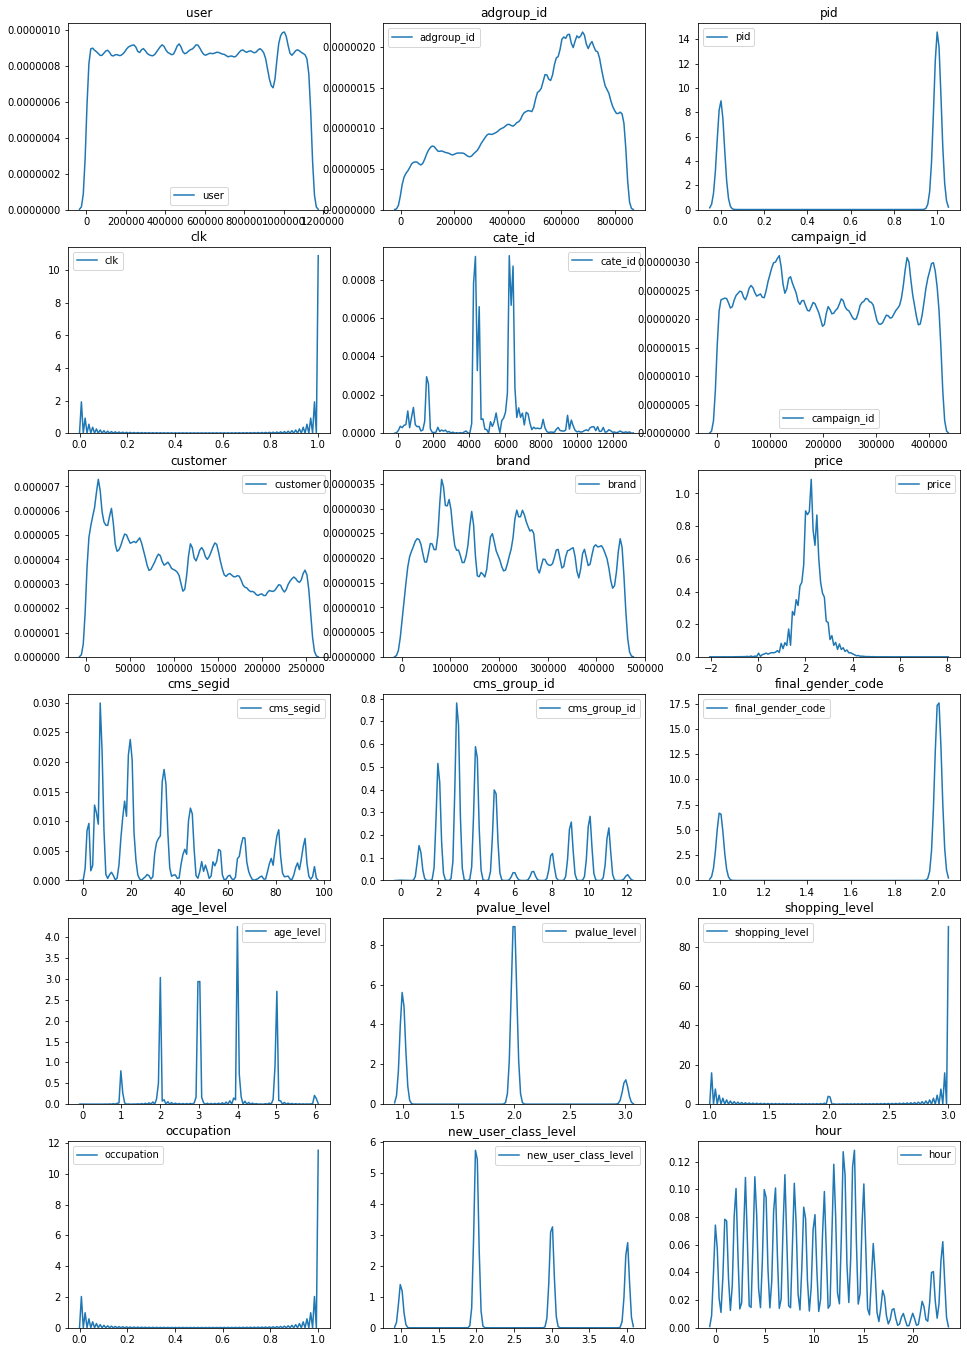

In [14]:
fig, axs = plt.subplots(6, 3, figsize =(16, 24))

cate_col_with_many_values = ['user', 'adgroup_id', 'pid', 'clk', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level ', 'hour']
for idx, ax in enumerate(axs.flatten()):
    sns.kdeplot(ctr[cate_col_with_many_values[idx]], ax = ax)
    ax.set_title(cate_col_with_many_values[idx])

plt.savefig('Distribution_of_Available_Features.png')

Plot the features to identify some patterns

In [15]:
# scale down the price by getting log of the original price and plot with three features 'pid', 'price' and 'pvalue_level'

ctr_sample = ctr.iloc[:100000]
ctr_sample['log_price']=np.log10(ctr_sample['price'])

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
# ctr_sample.plot(kind='scatter', x = 'pid', y='log_price', c='pvalue_level',
#                 cmap='viridis',alpha = 0.6, figsize=(15,10));

Text(0, 0.5, 'log10(price)')

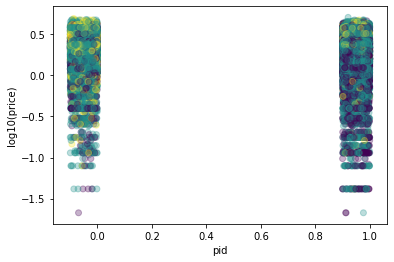

In [17]:
jitter = scs.uniform(-0.1,0.1).rvs(len(ctr_sample))
plt.scatter(x = ctr_sample['pid']+ jitter, y=ctr_sample['log_price'], c=ctr_sample['pvalue_level'],
                cmap='viridis',alpha = 0.3)
plt.xlabel('pid')
plt.ylabel('log10(price)')

Due to the highly overlapped data points, the plot above is not a good way to explore the relationship between features. We are going to plot the density distribution of each feature within click group and nonclick group to see if there is any difference in the distributions. So we can get some idea on which features have impact on click probability.

### Explore each features

##### views per user

In [18]:
ctr.head()

,user,adgroup_id,pid,clk,time,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
0,581738,1,1,0,2017-05-07 06:14:04,9025,108570,1337,20169.0,1.230449,0.0,8.0,1.0,2.0,NaN,3.0,0.0,NaN,6
1,449818,3,1,0,2017-05-13 01:26:18,5998,224368,30507,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,914836,4,1,0,2017-05-13 04:47:59,7958,385883,39662,216840.0,1.929419,0.0,5.0,2.0,5.0,NaN,3.0,0.0,2.0,4
3,914836,5,1,0,2017-05-13 04:50:29,7958,385883,39662,216840.0,1.778151,0.0,5.0,2.0,5.0,NaN,3.0,0.0,2.0,4
4,399907,8,1,0,2017-05-09 04:09:18,1626,388290,42349,241359.0,1.799341,0.0,5.0,2.0,5.0,NaN,3.0,0.0,2.0,4


In [66]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26557961 entries, 0 to 26557960
Data columns (total 19 columns):
user                     int64
adgroup_id               int64
pid                      int64
clk                      int64
time                     datetime64[ns]
cate_id                  int64
campaign_id              int64
customer                 int64
brand                    float64
price                    float64
cms_segid                float64
cms_group_id             float64
final_gender_code        float64
age_level                float64
pvalue_level             float64
shopping_level           float64
occupation               float64
new_user_class_level     float64
hour                     int64
dtypes: datetime64[ns](1), float64(10), int64(8)
memory usage: 3.8 GB


In [19]:
#Count the viewes by each user
user_view = ctr.groupby('user').size().sort_values()

In [20]:
user_view.head()

user
712897     1
1124412    1
492910     1
764718     1
371782     1
dtype: int64

In [68]:
user_view.sum()

26557961

We explore the distribution of the number of views per user below:

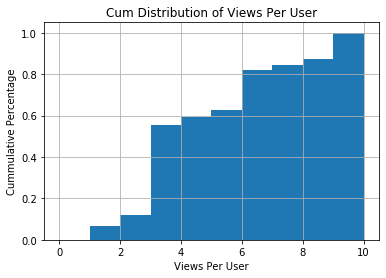

In [21]:
user_view.hist(range=(0,10), bins=10, cumulative=True, density=True)
plt.title('Cum Distribution of Views Per User')
plt.ylabel('Cummulative Percentage')
plt.xlabel('Views Per User')

plt.savefig('DistributionOfViewsPerUser.png')

In [65]:
user_view.describe()

count    1.141729e+06
mean     2.326118e+01
std      6.539253e+01
min      1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      2.000000e+01
max      3.756000e+03
dtype: float64

60% of users have equal to or less than 5 page views;
84% of users have equal to or less than 10 page views

##### views per ad by a user

In [22]:
user_view_per_ad = ctr.groupby(['user', 'adgroup_id']).size().sort_values(ascending =False)

In [23]:
user_view_per_ad.head()

user    adgroup_id
794330  459680        30
658554  566007        27
794330  506219        26
658554  527777        26
        674497        25
dtype: int64

In [24]:
user_view_per_ad.value_counts()

1     20657791
2      1986551
3       397235
4        93940
5        32362
6        13945
7         6507
8         3261
9         1736
10         992
11         561
12         329
13         166
14         103
15          75
16          48
17          27
18          14
20           6
19           5
22           4
23           4
21           2
24           2
26           2
27           1
25           1
30           1
dtype: int64

In [71]:
(20657791+1986551)/26557961

0.8526385741736724

78% of user see an ad once; 

7% of user see an ad twice

##### views per ad

In [25]:
ad_view = ctr.groupby('adgroup_id').size().sort_values(ascending=False)

In [26]:
ad_view.head()

adgroup_id
710164    70929
725105    25585
736349    25247
747157    24384
836889    23516
dtype: int64

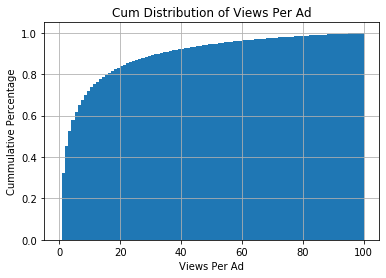

In [27]:
ad_view.hist(range=(0, 100), bins =100, density=True, cumulative=True)

plt.title('Cum Distribution of Views Per Ad')
plt.ylabel('Cummulative Percentage')
plt.xlabel('Views Per Ad')

plt.savefig('DistributionOfViewsPerAd.png')

In [72]:
ad_view.describe()

count    846811.000000
mean         31.362324
std         200.434141
min           1.000000
25%           1.000000
50%           4.000000
75%          15.000000
max       70929.000000
dtype: float64

##### click through rate

In [28]:
#ctr measured by adgroup_id
ad_clk = ctr.groupby('adgroup_id').agg({'time': 'count', 'clk': 'sum'})

In [29]:
ad_clk['ctr'] = ad_clk['clk']/ad_clk['time']

In [30]:
ad_clk.columns = ['views', 'click', 'ctr']
ad_clk.sort_values('click', ascending= False).head()

,views,click,ctr
adgroup_id,,,
710164,70929,6707,0.094559
725105,25585,2688,0.105062
836889,23516,2270,0.096530
632644,21254,1882,0.088548
749687,10098,1756,0.173896


In [31]:
ad_clk.describe()

,views,click,ctr
count,846811.000000,846811.000000,846811.000000
mean,31.362324,1.613177,0.036813
std,200.434141,14.439189,0.115466
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,15.000000,1.000000,0.028846
max,70929.000000,6707.000000,1.000000


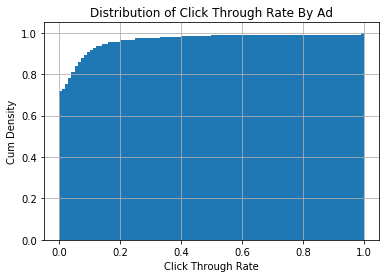

In [32]:
ad_clk['ctr'].hist(bins=100, density=True, cumulative=True)

plt.title('Distribution of Click Through Rate By Ad')
plt.ylabel('Cum Density')
plt.xlabel('Click Through Rate')

plt.savefig('CTRDensityDistribution.png')


Based on our analysis on views per user and per ad, we know the views per user per ad is very low and 98% of ads only get 1 view. So the click through rate measured by adgroup_id is very low. 80% of adds get 0 CTR. This will not provide much information for our prediction. Below we also use campaign_id, customer (advertiser id) and brand to measure the ctr.

In [33]:
#ctr measured by campaign_clk
campaign_clk = ctr.groupby('campaign_id').agg({'time': 'count', 'clk': 'sum'})

In [34]:
campaign_clk['ctr'] = campaign_clk['clk']/campaign_clk['time']

In [35]:
campaign_clk.columns = ['views', 'click', 'ctr']
campaign_clk.sort_values('click', ascending= False).head()

,views,click,ctr
campaign_id,,,
405490,109889,9777,0.088972
359520,128484,7266,0.056552
118601,75886,4475,0.058970
98970,47439,3512,0.074032
404347,39717,3000,0.075534


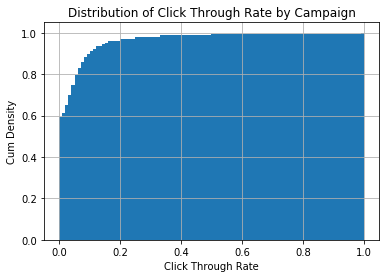

In [73]:
campaign_clk['ctr'].hist(bins=100, density=True, cumulative = True)

plt.title('Distribution of Click Through Rate by Campaign')
plt.ylabel('Cum Density')
plt.xlabel('Click Through Rate')

plt.savefig('CTRDensityDistributionByCampaign.png')

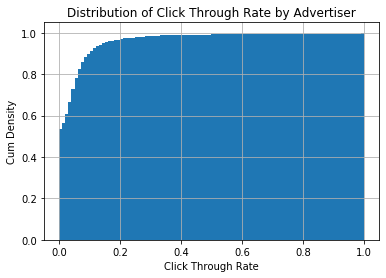

In [74]:
#ctr measured by customer
customer_clk = ctr.groupby('customer').agg({'time': 'count', 'clk': 'sum'})
customer_clk['ctr'] = customer_clk['clk']/customer_clk['time']
customer_clk.columns = ['views', 'click', 'ctr']

customer_clk['ctr'].hist(bins=100, density=True, cumulative=True)
plt.title('Distribution of Click Through Rate by Advertiser')
plt.ylabel('Cum Density')
plt.xlabel('Click Through Rate')
plt.savefig('CTRDensityDistributionByAdvertiser.png')

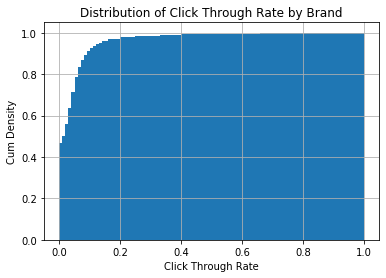

In [75]:
#ctr measured by brand
brand_clk = ctr.groupby('brand').agg({'time': 'count', 'clk': 'sum'})
brand_clk['ctr'] = brand_clk['clk']/brand_clk['time']
brand_clk.columns = ['views', 'click', 'ctr']

brand_clk['ctr'].hist(bins=100, density=True, cumulative=True)
plt.title('Distribution of Click Through Rate by Brand')
plt.ylabel('Cum Density')
plt.xlabel('Click Through Rate')
plt.savefig('CTRDensityDistributionByBrand.png')

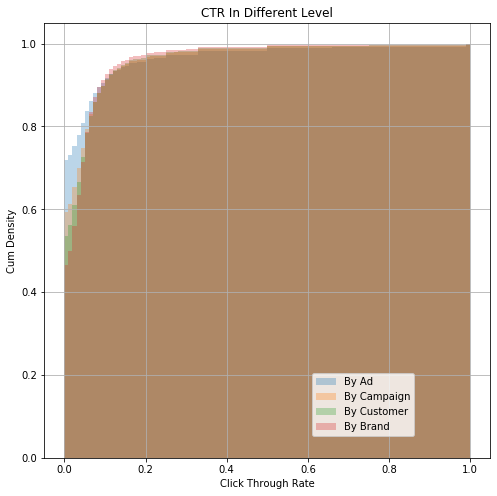

In [85]:
ad_clk['ctr'].hist(bins=100, density=True, cumulative=True, label= 'By Ad', alpha = 0.3, figsize=(8,8))
campaign_clk['ctr'].hist(bins=100, density=True, cumulative = True, label= 'By Campaign', alpha = 0.3, figsize=(8,8))
customer_clk['ctr'].hist(bins=100, density=True, cumulative=True, label= 'By Customer', alpha = 0.3, figsize=(8,8))
brand_clk['ctr'].hist(bins=100, density=True, cumulative=True, label= 'By Brand', alpha = 0.3, figsize=(8,8))
plt.title('CTR In Different Level')
plt.legend(loc=(0.6,0.05))
plt.ylabel('Cum Density')
plt.xlabel('Click Through Rate')
plt.savefig('CTR_Diff_Level.png')

### Explore the relationship

In [39]:
ctr_clk = ctr[ctr.clk == 1]
ctr_noclk = ctr[ctr.clk == 0]

In [40]:
n = len(ctr_clk)
m = len(ctr_noclk)
print('the click through rate is %.3f'%(n/(n+m)))

the click through rate is 0.051


In [41]:
ctr_clk.nunique()

user                     491647
adgroup_id               240130
pid                           2
clk                           1
time                     503411
cate_id                    5111
campaign_id              173888
customer                 119953
brand                     53784
price                      7938
cms_segid                    97
cms_group_id                 13
final_gender_code             2
age_level                     7
pvalue_level                  3
shopping_level                3
occupation                    2
new_user_class_level          4
hour                         24
dtype: int64

In [42]:
ctr_clk.adgroup_id.value_counts()

710164    6707
725105    2688
836889    2270
632644    1882
749687    1756
632432    1728
711852    1683
747157    1331
736349    1255
690381    1114
726310    1057
819177    1051
627130    1046
541053     977
739213     948
684497     948
715171     930
775657     927
601687     926
659211     925
671112     918
759279     893
782118     867
684724     862
701127     859
659289     839
630855     809
655187     791
608584     781
735428     776
          ... 
544289       1
424935       1
316684       1
277777       1
271634       1
642577       1
369954       1
372003       1
367909       1
390440       1
329014       1
355643       1
349500       1
603662       1
601613       1
591368       1
435522       1
458057       1
423256       1
427000       1
410974       1
492902       1
523625       1
519531       1
398314       1
509294       1
472432       1
396265       1
490873       1
8188         1
Name: adgroup_id, Length: 240130, dtype: int64

In [43]:
related_features = ['adgroup_id', 'pid', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level ', 'hour']
y = ctr.clk

/Users/elainewu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


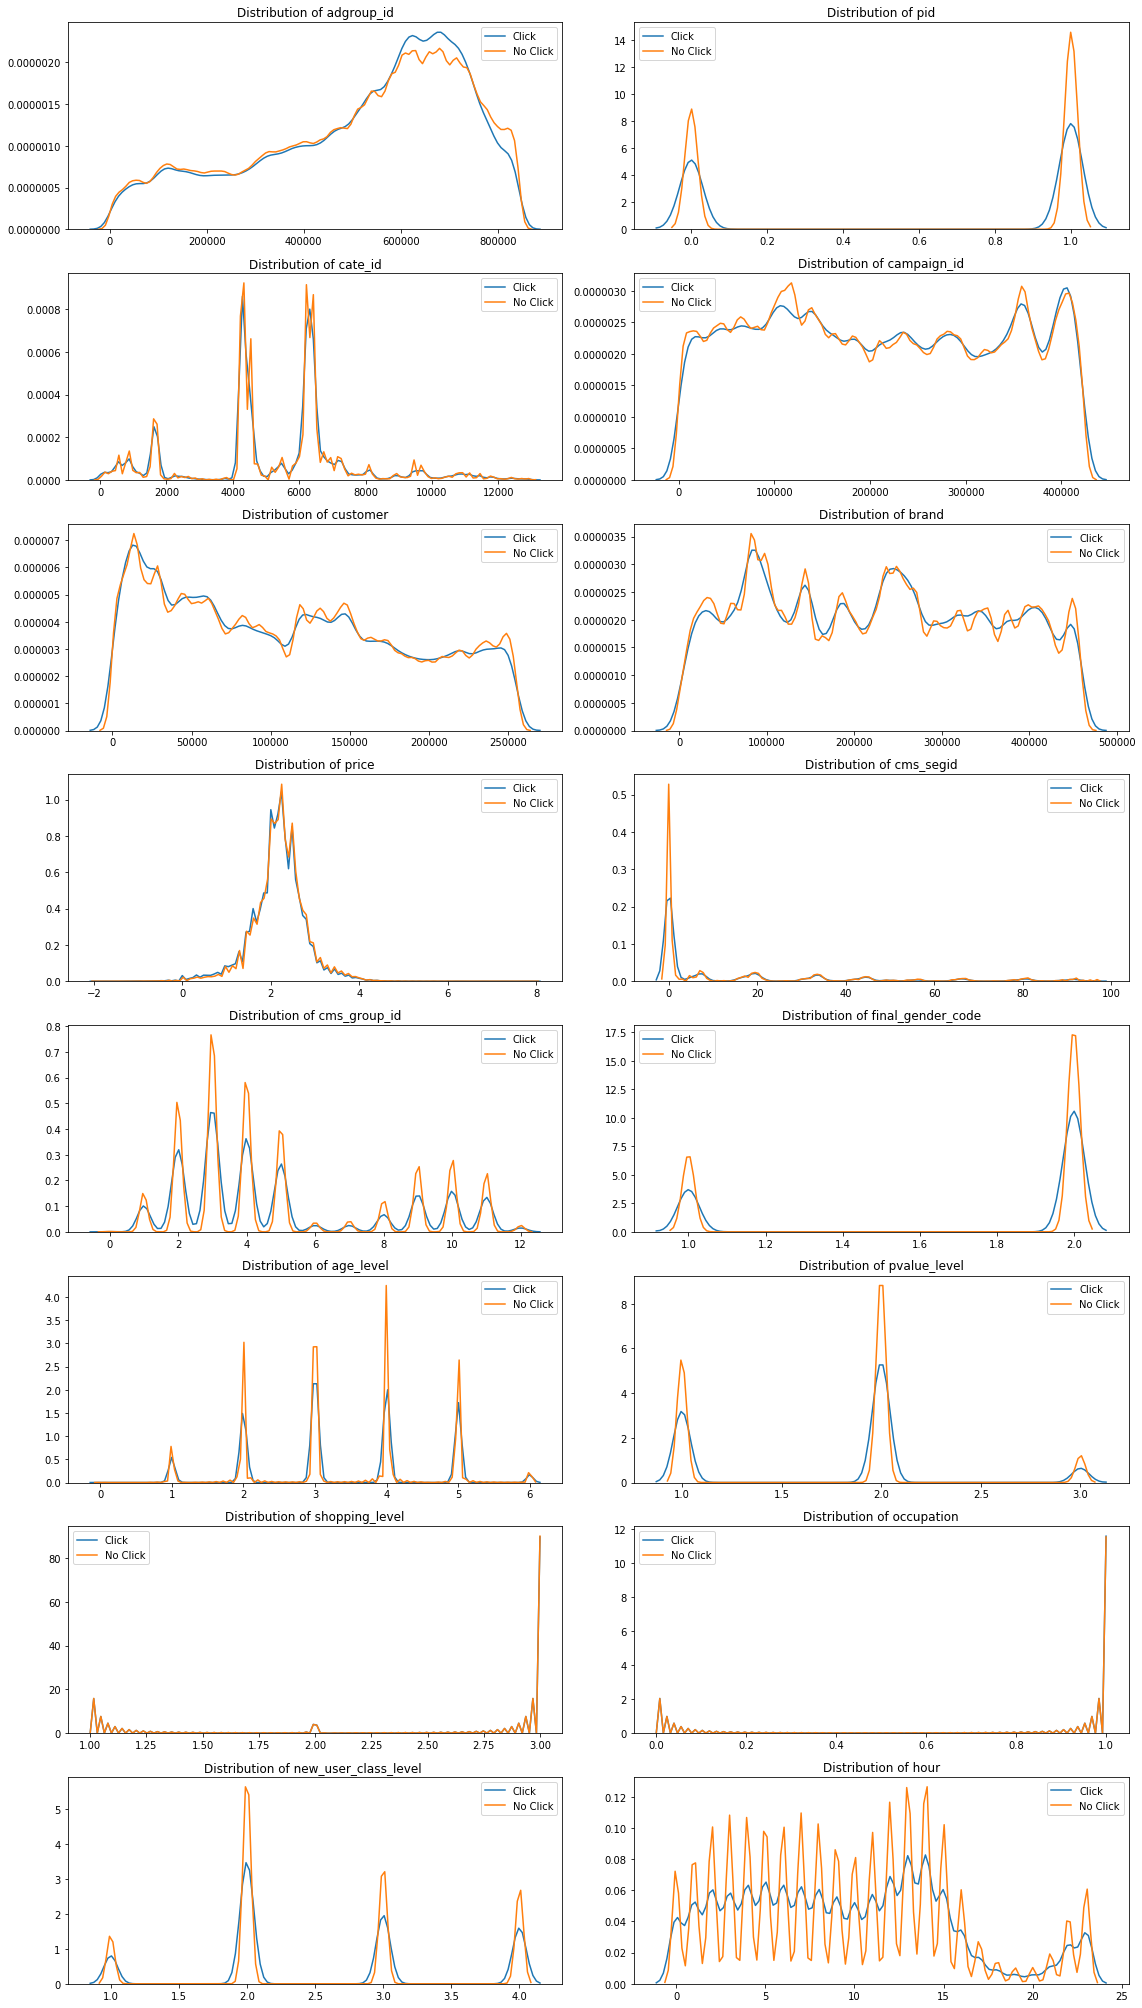

In [86]:
fig, axs = plt.subplots(8, 2, figsize =(16, 28))


for idx, ax in enumerate(axs.flatten()):
    sns.kdeplot(ctr_clk[related_features[idx]], ax = ax, label = 'Click', legend = True)
    sns.kdeplot(ctr_noclk[related_features[idx]], ax = ax, label = 'No Click', legend = True)
    ax.set_title('Distribution of %s' %related_features[idx])

plt.tight_layout()
plt.savefig('Distribution_of_Features_in_clk_noclk_groups.png')

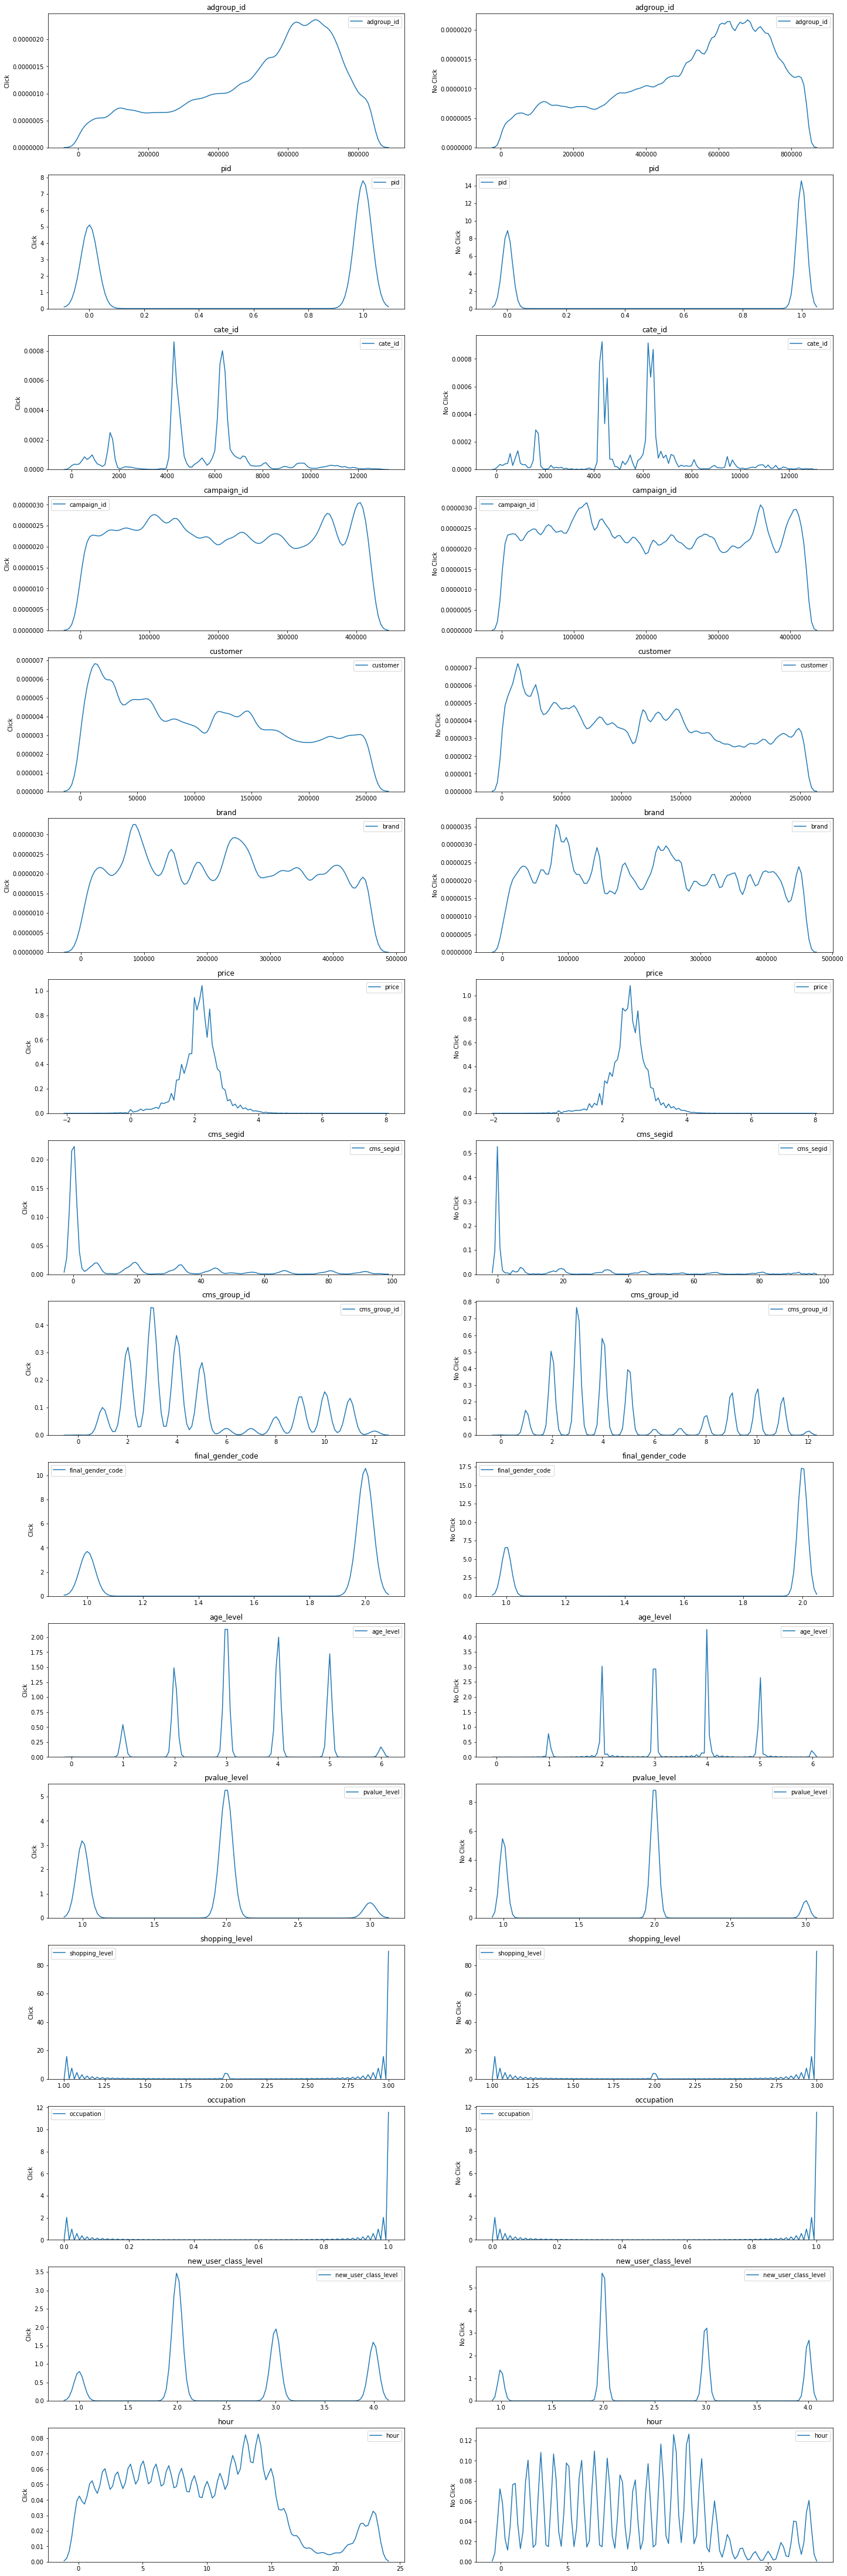

In [45]:
fig, axs = plt.subplots(16, 2, figsize =(24, 80))


for idx, ax in enumerate(axs.flatten()):
    if idx % 2 == 0:
        sns.kdeplot(ctr_clk[related_features[int(idx/2)]], ax = ax)
        ax.set_title(related_features[int(idx/2)])
        ax.set_ylabel('Click')
    if idx % 2 == 1:
        sns.kdeplot(ctr_noclk[related_features[int((idx-1)/2)]], ax = ax)
        ax.set_title(related_features[int((idx-1)/2)])
        ax.set_ylabel('No Click')
    

From the distribution of the features for the click and no-click group, the distributions of the features 'shopping_level' and 'occupation' for the two groups are highly overlapped.

* 'adgroup_id' - distribution is similar in two groups
* 'pid' - Different
* 'cate_id' - Different
* 'campaign_id' - slightly diff
* 'customer' -
* 'brand' -
* 'price' -
* 'cms_segid' -
* 'cms_group_id'-
* 'final_gender_code' -
* 'age_level' -
* 'pvalue_level' -
* 'shopping_level' - distribution is similar in two groups
* 'occupation'- distribution is similar in two groups
* 'new_user_class_level ' - 
* 'hour'

#### Handle missing values

In [46]:
missing_pct = ctr.isnull().sum()/len(ctr)
missing_pct

user                     0.000000
adgroup_id               0.000000
pid                      0.000000
clk                      0.000000
time                     0.000000
cate_id                  0.000000
campaign_id              0.000000
customer                 0.000000
brand                    0.312211
price                    0.000000
cms_segid                0.057554
cms_group_id             0.057554
final_gender_code        0.057554
age_level                0.057554
pvalue_level             0.547964
shopping_level           0.057554
occupation               0.057554
new_user_class_level     0.309694
hour                     0.000000
dtype: float64

For the missing values, we simply dropped the 6% entries missing most of user features. For the three features ('brand', 'Pvalue' and 'new_user_class_level') have a high ratio of missing values, we imputed mode for now.

In [64]:
# sns.heatmap(ctr.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [48]:
# sns.heatmap(ctr_clk.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [49]:
missing_pct_clk = ctr_clk.isnull().sum()/len(ctr_clk)
missing_pct_clk

user                     0.000000
adgroup_id               0.000000
pid                      0.000000
clk                      0.000000
time                     0.000000
cate_id                  0.000000
campaign_id              0.000000
customer                 0.000000
brand                    0.334778
price                    0.000000
cms_segid                0.059692
cms_group_id             0.059692
final_gender_code        0.059692
age_level                0.059692
pvalue_level             0.551045
shopping_level           0.059692
occupation               0.059692
new_user_class_level     0.316549
hour                     0.000000
dtype: float64

In [50]:
missing_pct_noclk = ctr_noclk.isnull().sum()/len(ctr_noclk)
missing_pct_noclk

user                     0.000000
adgroup_id               0.000000
pid                      0.000000
clk                      0.000000
time                     0.000000
cate_id                  0.000000
campaign_id              0.000000
customer                 0.000000
brand                    0.310988
price                    0.000000
cms_segid                0.057438
cms_group_id             0.057438
final_gender_code        0.057438
age_level                0.057438
pvalue_level             0.547797
shopping_level           0.057438
occupation               0.057438
new_user_class_level     0.309322
hour                     0.000000
dtype: float64

The missing values is randomly distributed and the missing percentage is almost same in both of clk and noclk groups. So we simply drop the entries without user features and 1) drop, or 2) impute mode for 'brand', 'pvalue_level' and 'new_user_class_level'

In [51]:
drop_index = ctr[ctr['cms_segid'].isnull()].index

In [52]:
ctr_complete = ctr.drop(drop_index, axis = 0)

In [53]:
ctr_complete_filled = ctr_complete.fillna(ctr_complete.mode().iloc[0])

In [54]:
ctr_complete_noclk = ctr_complete_filled[ctr_complete_filled.clk == 0]
ctr_complete_clk = ctr_complete_filled[ctr_complete_filled.clk == 1]

##### Comparison after imputation

In [55]:
# fig, axs = plt.subplots(8, 2, figsize =(24, 80))


# for idx, ax in enumerate(axs.flatten()):
#     sns.kdeplot(ctr_complete_clk[related_features[idx]], ax = ax, label = 'Click', legend = True)
#     sns.kdeplot(ctr_complete_noclk[related_features[idx]], ax = ax, label = 'No Click', legend = True)
#     ax.set_title(related_features[idx])

##### chi-square test for feature selection

In [56]:
ctr_chi2 = ctr_complete_filled.copy()
y = ctr_chi2.pop('clk')

In [57]:
#'time' is converted to hour, 'price' is the only numeric feature
ctr_chi2.drop(['user', 'time', 'price'], axis =1, inplace=True)

In [58]:
x = ctr_chi2

In [59]:
x.head()

,adgroup_id,pid,cate_id,campaign_id,customer,brand,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
0,1,1,9025,108570,1337,20169.0,0.0,8.0,1.0,2.0,2.0,3.0,0.0,2.0,6
2,4,1,7958,385883,39662,216840.0,0.0,5.0,2.0,5.0,2.0,3.0,0.0,2.0,4
3,5,1,7958,385883,39662,216840.0,0.0,5.0,2.0,5.0,2.0,3.0,0.0,2.0,4
4,8,1,1626,388290,42349,241359.0,0.0,5.0,2.0,5.0,2.0,3.0,0.0,2.0,4
5,9,1,9784,393714,32496,457216.0,0.0,9.0,1.0,3.0,2.0,1.0,0.0,2.0,17


In [60]:
chi2_stats, p_values = chi2(x, y)

In [61]:
x.columns

Index(['adgroup_id', 'pid', 'cate_id', 'campaign_id', 'customer', 'brand',
       'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level ',
       'hour'],
      dtype='object')

In [62]:
chi2_test = pd.DataFrame({'chi2_stats':chi2_stats, 'p_values': p_values}, columns=['chi2_stats', 'p_values'], index =x.columns)
chi2_test

,chi2_stats,p_values
adgroup_id,2.520317e+07,0.000000e+00
pid,6.255666e+02,4.603067e-138
cate_id,3.583285e+05,0.000000e+00
campaign_id,3.114576e+07,0.000000e+00
customer,4.090640e+07,0.000000e+00
brand,7.632631e+06,0.000000e+00
cms_segid,1.939470e+04,0.000000e+00
cms_group_id,2.860607e+03,0.000000e+00
final_gender_code,1.981185e+02,5.375513e-45
age_level,2.345924e+01,1.275883e-06


In [63]:
# ctr_complete_filled.to_csv('data/test/ctr_ad_user_test_imputed.csv')